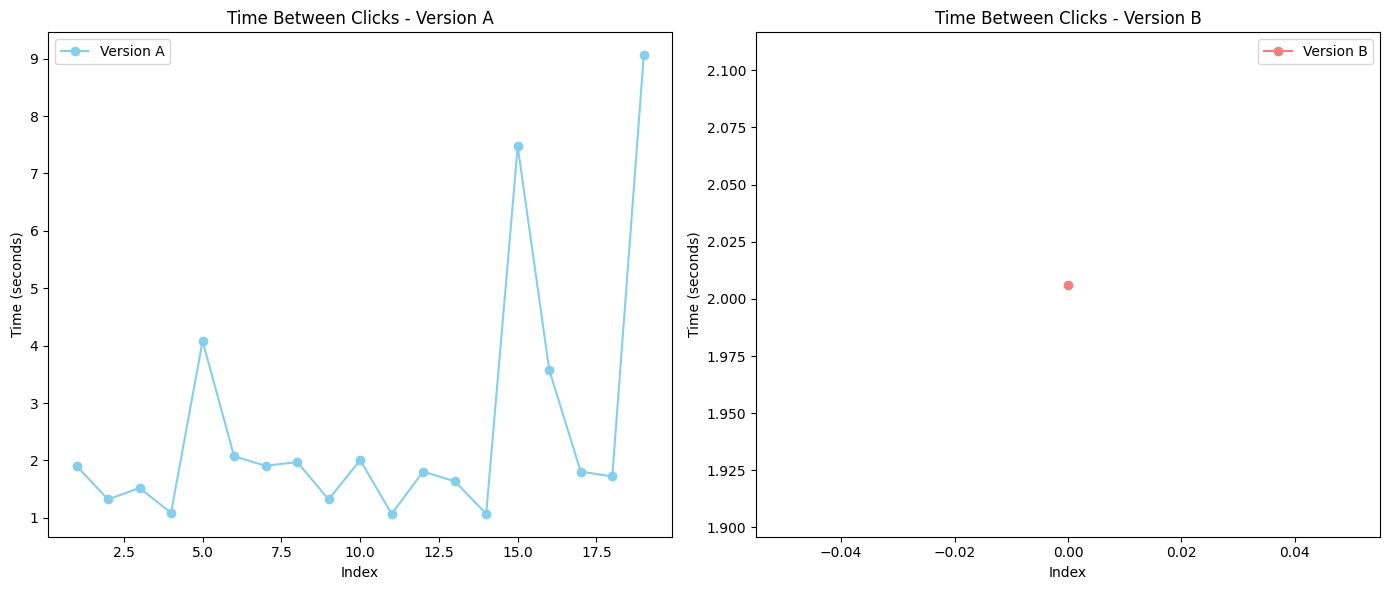

In [ ]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

url = "https://compucore.itcarlow.ie/Mole_Patrol_Analytics/get_data"
response = requests.get(url)
data = response.json()

filtered_data = [entry for entry in data['data'] if "timeBetweenClicks" in entry and "gameVersion" in entry]

df = pd.DataFrame(filtered_data)

if not df.empty and 'gameVersion' in df.columns:
	version_a = df[df['gameVersion'] == 'A']
	version_b = df[df['gameVersion'] == 'B']
else:
	version_a = pd.DataFrame()
	version_b = pd.DataFrame()


plt.figure(figsize=(14, 6))

# Game Version A
plt.subplot(1, 2, 1)
plt.plot(version_a.index, version_a['timeBetweenClicks'], marker='o', color='skyblue', label='Version A')
plt.title("Time Between Clicks - Version A")
plt.xlabel("Index")
plt.ylabel("Time (seconds)")
plt.legend()

# Game Version B
plt.subplot(1, 2, 2)
plt.plot(version_b.index, version_b['timeBetweenClicks'], marker='o', color='lightcoral', label='Version B')
plt.title("Time Between Clicks - Version B")
plt.xlabel("Index")
plt.ylabel("Time (seconds)")
plt.legend()

plt.tight_layout()
plt.show()
